# HOUSING PRICE PREDICTION USING LINEAR REGRESSION,KNN AND DESICION TREE CLASSIFICATION

### In this project we predict the price of the house using the given dataset and apply regression ,KNN and Desicion tree classification methods tp predict the value of the house

### Importing the libraries and dataset 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_csv("kc_house_data.csv")

In [63]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
data.shape

(21613, 21)

In [65]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### feature engineering

In [67]:
data=data.drop(["id","date","zipcode"],axis=1)

In [68]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [69]:
data=data.dropna(how="all")

In [70]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [71]:
data.bathrooms=data.bathrooms.astype('int64')

In [72]:
data.shape

(21613, 18)

In [73]:
temp=pd.DataFrame(index=data.columns)
temp["data_type"]=data.dtypes
temp["null_type"]=data.isnull().sum()
temp["unique_count"]=data.nunique()
temp

,data_type,null_type,unique_count
price,float64,0,4028
bedrooms,int64,0,13
bathrooms,int64,0,9
sqft_living,int64,0,1038
sqft_lot,int64,0,9782
floors,float64,0,6
waterfront,int64,0,2
view,int64,0,5
condition,int64,0,5
grade,int64,0,12


In [74]:
data["int_sqft"]=data["sqft_living"]+data['sqft_lot']+data['sqft_above']+data['sqft_basement']+data["sqft_living15"]+data['sqft_lot15']
data["int_sqft"]      

0        15000.0
1        21711.0
2        22322.0
3        15280.0
4        20743.0
          ...   
21608     7230.0
21609    19463.0
21610     6417.0
21611     8285.0
21612     5493.0
Name: int_sqft, Length: 21613, dtype: float64

In [75]:
data.drop(["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"],axis=1)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,int_sqft
0,221900.0,3,1,1.0,0,0,3,7,1955,0,47.5112,-122.257,15000.0
1,538000.0,3,2,2.0,0,0,3,7,1951,1991,47.7210,-122.319,21711.0
2,180000.0,2,1,1.0,0,0,3,6,1933,0,47.7379,-122.233,22322.0
3,604000.0,4,3,1.0,0,0,5,7,1965,0,47.5208,-122.393,15280.0
4,510000.0,3,2,1.0,0,0,3,8,1987,0,47.6168,-122.045,20743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,3.0,0,0,3,8,2009,0,47.6993,-122.346,7230.0
21609,400000.0,4,2,2.0,0,0,3,8,2014,0,47.5107,-122.362,19463.0
21610,402101.0,2,0,2.0,0,0,3,7,2009,0,47.5944,-122.299,6417.0
21611,400000.0,3,2,2.0,0,0,3,8,2004,0,47.5345,-122.069,8285.0


In [76]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,int_sqft
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,15000.0
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639,21711.0
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,22322.0
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,15280.0
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,20743.0


Text(0.5, 0, 'sales')

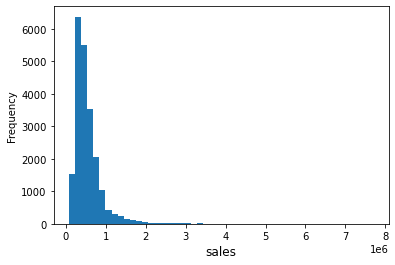

In [77]:
data["price"].plot.hist(bins=50)
plt.xlabel("sales",fontsize=12)

Text(0.5, 0, 'area in square feet')

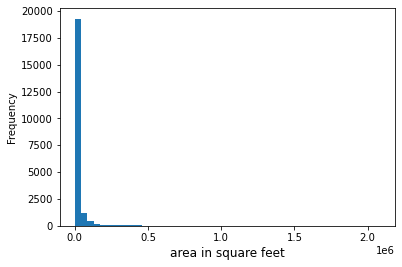

In [78]:
data["int_sqft"].plot.hist(bins=50)
plt.xlabel("area in square feet",fontsize=12)

### treating outliers

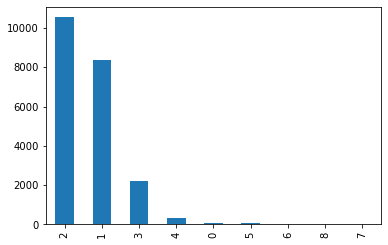

In [79]:
data["bathrooms"].value_counts().plot(kind="bar")

In [80]:
data.loc[data["bathrooms"]>4]=np.mean(data["bathrooms"])

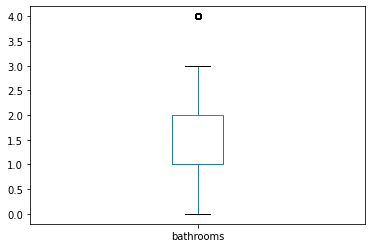

In [81]:
data["bathrooms"].plot.box()

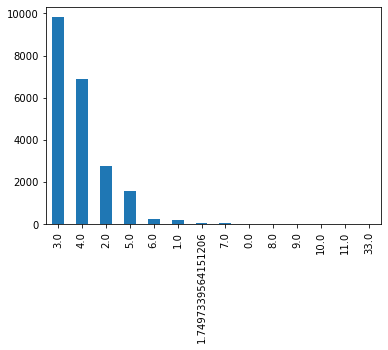

In [82]:
data["bedrooms"].value_counts().plot(kind="bar")

In [83]:
data.loc[data["bedrooms"]>4]=np.mean(data["bedrooms"])

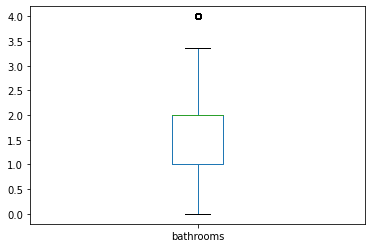

In [84]:
data["bathrooms"].plot.box()

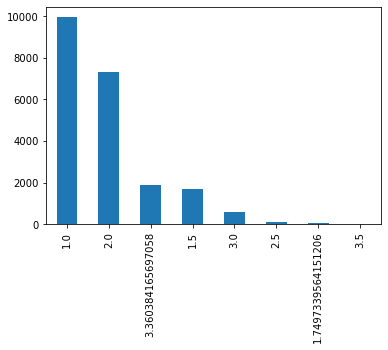

In [85]:
data["floors"].value_counts().plot(kind="bar")

In [86]:
data.loc[data["floors"]>4]=np.mean(data["floors"])

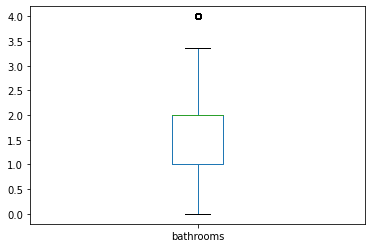

In [87]:
data["bathrooms"].plot.box()

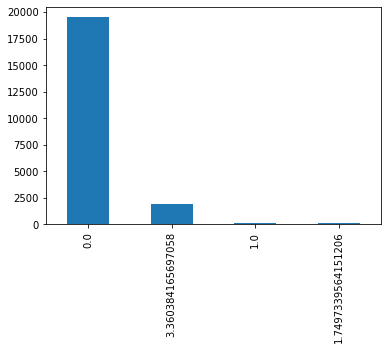

In [88]:
data["waterfront"].value_counts().plot(kind="bar")

In [89]:
data.loc[data["waterfront"]>3]=np.mean(data["waterfront"])

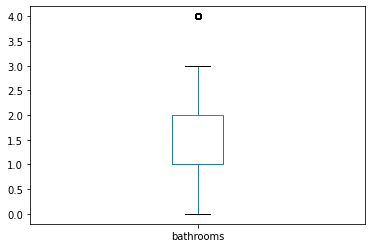

In [90]:
data["bathrooms"].plot.box()

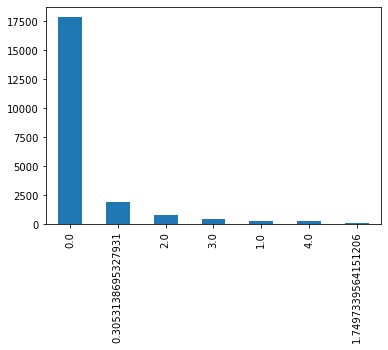

In [91]:
data["view"].value_counts().plot(kind="bar")

In [92]:
data.loc[data["view"]>4]=np.mean(data["view"])

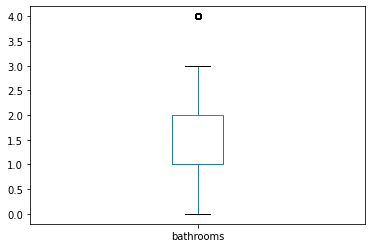

In [93]:
data["bathrooms"].plot.box()

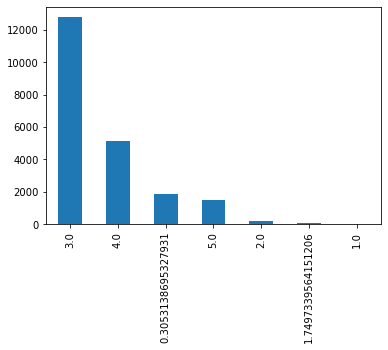

In [94]:
data["condition"].value_counts().plot(kind="bar")

In [95]:
data.loc[data["condition"]>5]=np.mean(data["condition"])

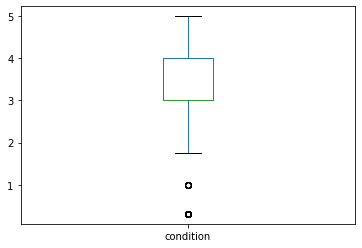

In [96]:
data["condition"].plot.box()

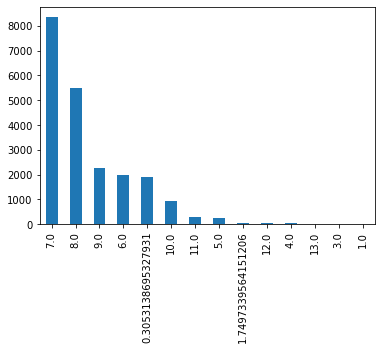

In [97]:
data["grade"].value_counts().plot(kind="bar")

In [98]:
data.loc[data["grade"]>13]=np.mean(data["grade"])

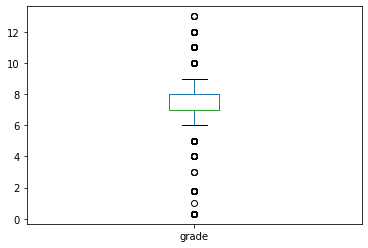

In [99]:
data["grade"].plot.box()

In [100]:
#data["int_sqft"].value_counts().plot(kind="bar")

In [101]:
data.loc[data["price"]>180000]=np.mean(data["price"])

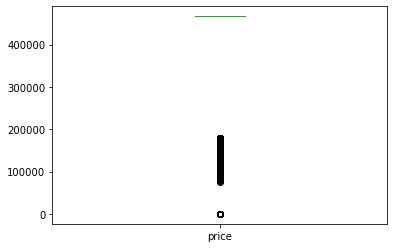

In [102]:
data["price"].plot.box()

### Data manipulation

In [103]:
#data=data.drop_duplicates()

In [104]:
#data.drop_duplicates()

In [105]:
data.shape

(21613, 19)

In [106]:
data.isnull().shape

(21613, 19)

In [107]:
data=data.dropna()

In [108]:
data.shape

(21613, 19)

In [109]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,int_sqft
0,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232
1,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232
2,180000.000000,2.000000,1.000000,770.000000,10000.000000,1.000000,0.000000,0.000000,3.000000,6.000000,770.000000,0.000000,1933.000000,0.000000,47.737900,-122.233000,2720.000000,8062.000000,22322.000000
3,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232
4,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232,467092.639232


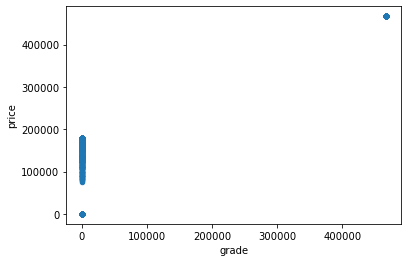

In [110]:
data.plot.scatter("grade","price")

In [111]:
for i in range(0,len(data)):
    if (data["yr_renovated"][i]==0):
        data["year"]=2020-data["yr_built"]
    else:
        data["year"]=2020-data["yr_renovated"]

In [112]:
data["year"]

0       -465072.639232
1       -465072.639232
2          2020.000000
3       -465072.639232
4       -465072.639232
             ...      
21608   -465072.639232
21609   -465072.639232
21610   -465072.639232
21611   -465072.639232
21612   -465072.639232
Name: year, Length: 21613, dtype: float64

In [113]:
data=data.drop(["yr_built","yr_renovated"],axis=1)

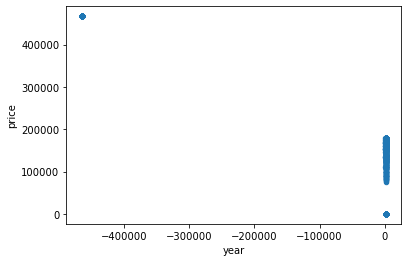

In [114]:
data.plot.scatter("year","price")

### train test split

In [115]:
x=data.drop(["price"],axis=1)
y=data["price"]
x.shape,y.shape

((21613, 17), (21613,))

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

### Linear Rgression

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [119]:
model1=LinearRegression()

In [120]:
model1.fit(train_x,train_y)

LinearRegression()

In [121]:
model1.score(train_x,train_y)

0.9994247793375924

In [122]:
model1.score(test_x,test_y)

0.9994489623431885

In [123]:
pred1=model1.predict(test_x)

In [124]:
pred1[:10],model1.score(test_x,test_y)

(array([4.67092634e+05, 4.67092634e+05, 4.67092634e+05, 4.13743034e-01,
        4.67092634e+05, 4.67092634e+05, 4.67092634e+05, 4.67092634e+05,
        4.67092634e+05, 4.67092634e+05]),
 0.9994489623431885)

### KNeighbors Regression

In [125]:
model2=KNeighborsRegressor(n_neighbors=3)

In [126]:
model2.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [127]:
model2.score(train_x,train_y)

0.9995296222703671

In [128]:
model2.score(test_x,test_y)

0.9990787270253019

In [129]:
pred2=model2.predict(test_x)

In [130]:
pred2[:10],model2.score(test_x,test_y)

(array([4.67092639e+05, 4.67092639e+05, 4.67092639e+05, 3.05313870e-01,
        4.67092639e+05, 4.67092639e+05, 4.67092639e+05, 4.67092639e+05,
        4.67092639e+05, 4.67092639e+05]),
 0.9990787270253019)

### Decision Tree Regressor

In [131]:
model3=DecisionTreeRegressor(max_depth=7)

In [132]:
model3.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=7)

In [133]:
model3.score(train_x,train_y)

0.9996410512477026

In [134]:
model3.score(test_x,test_y)

0.9991727555588183

In [135]:
pred3=model3.predict(test_x)

In [136]:
pred3[:10],model3.score(test_x,test_y)

(array([4.67092639e+05, 4.67092639e+05, 4.67092639e+05, 3.05313870e-01,
        4.67092639e+05, 4.67092639e+05, 4.67092639e+05, 4.67092639e+05,
        4.67092639e+05, 4.67092639e+05]),
 0.9991727555588183)

### ensembling models

In [137]:
from statistics import mean

In [138]:
final_pred=np.array([])

In [139]:
for i in range(0,len(test_x)):
    final_pred=np.append(final_pred,mean([pred1[i],pred2[i],pred3[i]]))

In [140]:
from sklearn.metrics import r2_score

In [141]:
r2_score(test_y,final_pred)

0.9993962131923572

In [142]:
r2_score(test_y,pred1),r2_score(test_y,pred2),r2_score(test_y,pred3)

(0.9994489623431885, 0.9990787270253019, 0.9991727555588183)